In [ ]:
# se importan los módulos necesarios para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# se carga el archivo y se lo previsualiza

arch = "house_price_regression_dataset.csv"
df = pd.read_csv(arch)
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [ ]:
# vemos información de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [16]:
# chequeo si hay valores faltantes

df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

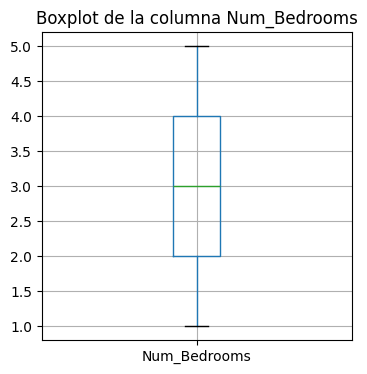

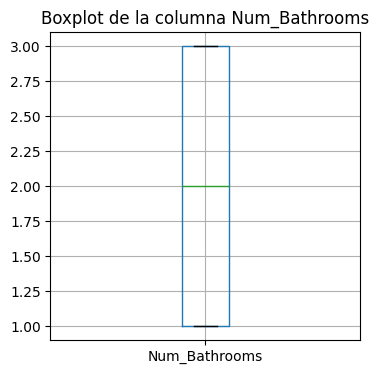

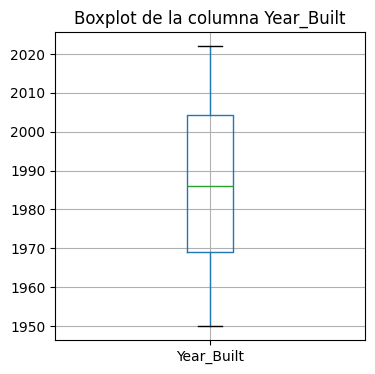

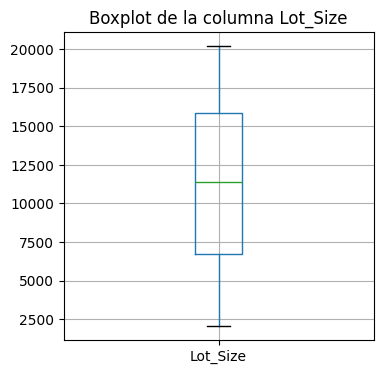

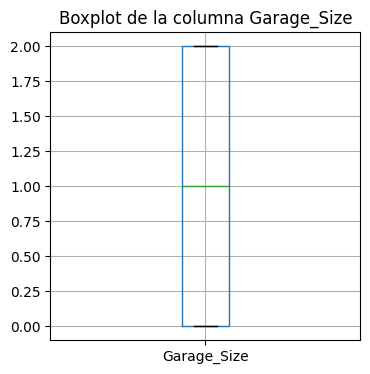

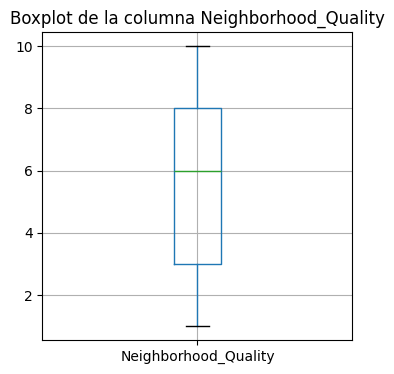

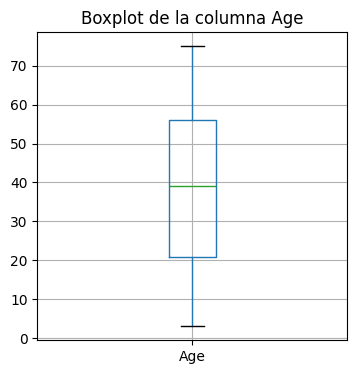

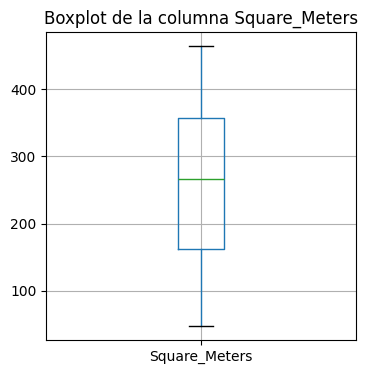

In [50]:
# chequeo si las columnas tienen outliers
for col in df.columns:
    plt.figure(figsize=(4,4))
    df.boxplot(column=col)
    plt.title(f"Boxplot de la columna {col}")
    plt.show()

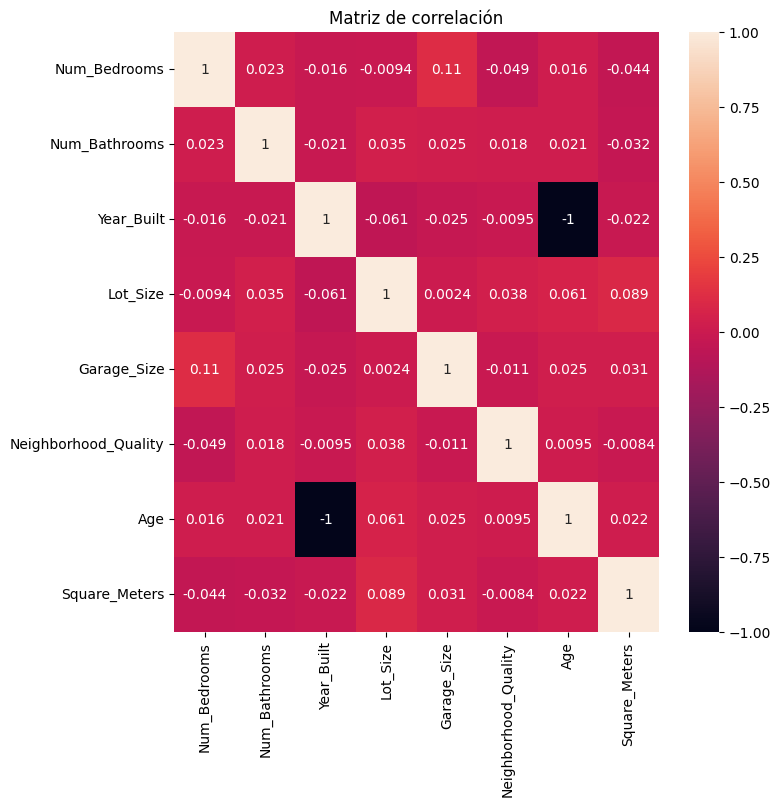

In [52]:
# se grafica una matriz de correlacion, para ver las relaciones entre cada variable

matriz_corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(matriz_corr,annot=True)
plt.tight_layout()
plt.title("Matriz de correlación")
plt.show()

In [17]:
# paso columnas a valores métricos y agrego edad de cada propiedad

df['Age'] = 2025 - df['Year_Built']
df['Square_Meters'] = df['Square_Footage'] / 10.764
df['Lot_Size'] = df['Lot_Size'] * 4047
df.drop('Square_Footage',axis=1,inplace=True)

In [18]:
df

,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Age,Square_Meters
0,2,1,1981,2426.729481,0,5,2.623829e+05,44,126.347083
1,3,3,2016,19235.447049,1,6,9.852609e+05,9,396.878484
2,1,2,2016,14710.127550,0,9,7.779774e+05,9,333.704942
3,1,2,1977,11051.008847,1,8,2.296989e+05,48,89.743590
4,2,1,1993,19017.146629,0,8,1.041741e+06,32,457.636566
...,...,...,...,...,...,...,...,...,...
995,4,1,1978,8762.201621,2,10,7.014940e+05,47,302.954292
996,1,2,1999,12048.416769,1,10,6.837232e+05,26,295.336306
997,4,2,1962,16410.855287,0,2,5.720240e+05,63,242.103307
998,5,2,1950,7814.439234,0,7,9.648653e+05,75,438.777406


In [ ]:
# elijo las variables target y de entrenamiento

y = df['House_Price']
df.drop('House_Price',axis=1,inplace=True)
X = df


In [ ]:
# escalo los datos para que el modelo pueda entender mejor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.69383623, -1.18669921, -0.26912227, ..., -0.21312613,
         0.26912227, -1.15980323],
       [ 0.00700845,  1.25255918,  1.42804518, ...,  0.13342042,
        -1.42804518,  1.16072443],
       [-1.39468091,  0.03292999,  1.42804518, ...,  1.17306009,
        -1.42804518,  0.61884297],
       ...,
       [ 0.70785312,  0.03292999, -1.19044174, ..., -1.25276579,
         1.19044174, -0.16688515],
       [ 1.4086978 ,  0.03292999, -1.77232772, ...,  0.47996698,
         1.77232772,  1.52011933],
       [ 0.70785312,  0.03292999, -0.17214127, ..., -1.25276579,
         0.17214127,  0.36065239]], shape=(1000, 8))

In [31]:
# separo en datos de entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y)

In [39]:
# definimos los modelos a utilizar y se entrena cada uno
# luego, se imprimen los valores de error absoluto medio y error cuadrático medio

# separo en datos de entrenamiento y testeo

x_train, x_test, y_train, y_test = train_test_split(X_scaled,y)

# modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(verbosity=0)
}

predicciones = {}
# entrenamiento y errrores
for nombre,modelo in models.items():
    modelo.fit(x_train,y_train)
    predicciones[nombre] = modelo.predict(x_test)
    y_pred = modelo.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    print(f"{nombre} -> MAE:{mae:.2f}, MSE:{mse:.2f}")




Linear Regression -> MAE:7657.77, MSE:94355212.83
Random Forest Regressor -> MAE:15288.48, MSE:391750142.86
XGBoost Regressor -> MAE:14562.75, MSE:325534384.68


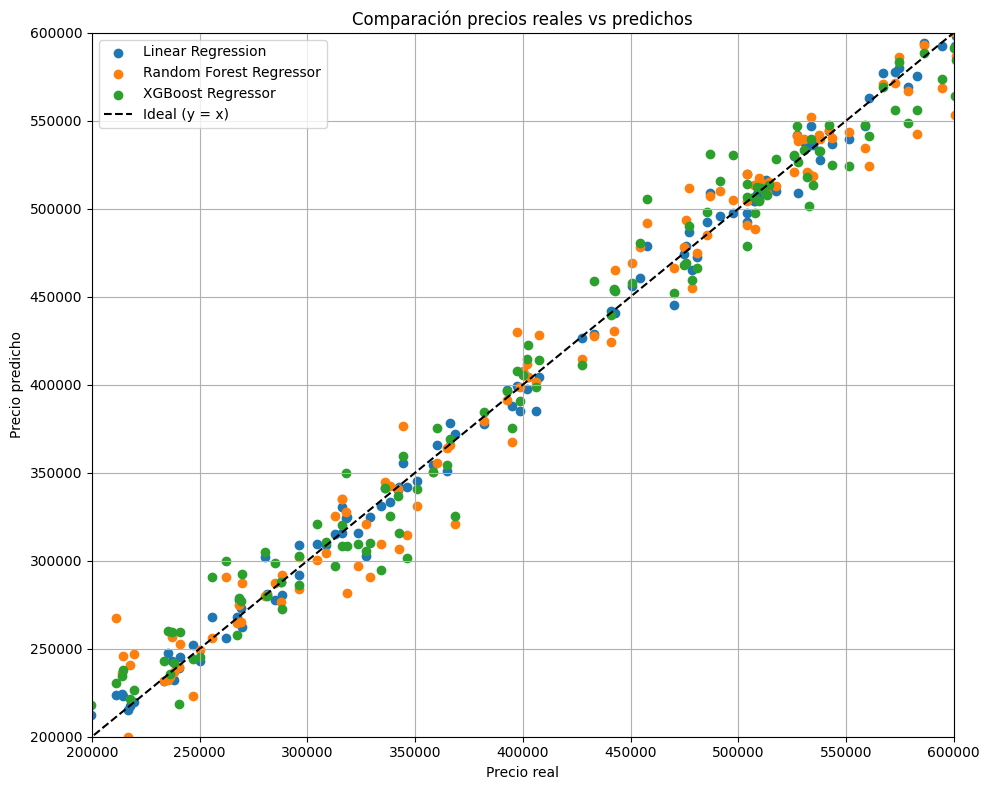

In [47]:
plt.figure(figsize=(10,8))
for nombre, y_pred in predicciones.items():
    plt.scatter(y_test,y_pred,label=nombre)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal (y = x)')
plt.title("Comparación precios reales vs predichos")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.legend()
plt.grid(True)
plt.xlim(200000,600000)
plt.ylim(200000,600000)
plt.tight_layout()
plt.show()